# **Starting by Importing Libraris and reading the file**

In [228]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np

df = pd.read_csv('parkinsons data.csv')

# **EDA: Exploratory Data Analysis**

In [230]:
df.shape

(195, 24)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [232]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [233]:
df.drop(columns = "name" , axis = 1 , inplace = True)

**Univariate Analysis**

---



In [254]:
numerical_features = df.drop(columns=['status']).select_dtypes(include=['number']).columns
for feature in numerical_features:
    print(f"Descriptive Statistics for {feature}:")
    print(df[feature].describe())
    print("\n")

Descriptive Statistics for MDVP:Fo(Hz):
count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: MDVP:Fo(Hz), dtype: float64


Descriptive Statistics for MDVP:Fhi(Hz):
count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: MDVP:Fhi(Hz), dtype: float64


Descriptive Statistics for MDVP:Flo(Hz):
count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: MDVP:Flo(Hz), dtype: float64


Descriptive Statistics for MDVP:Jitter(Abs):
count    195.000000
mean       0.000044
std        0.000035
min        0.000007
25%        0.000020
50%        0.000030
75%        0.000060
max        0.000260
Name: MDVP:Jitter(Abs), dtype: float64


Descriptive Statistics for MDVP:Shimmer(dB

**Bivariate Analysis**

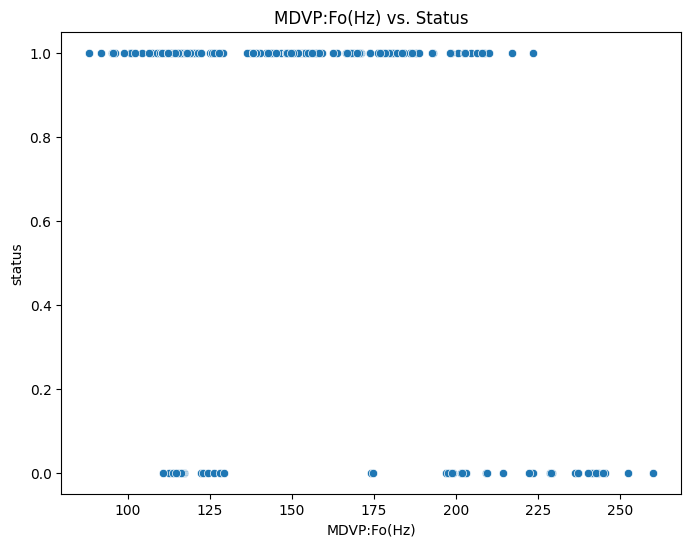

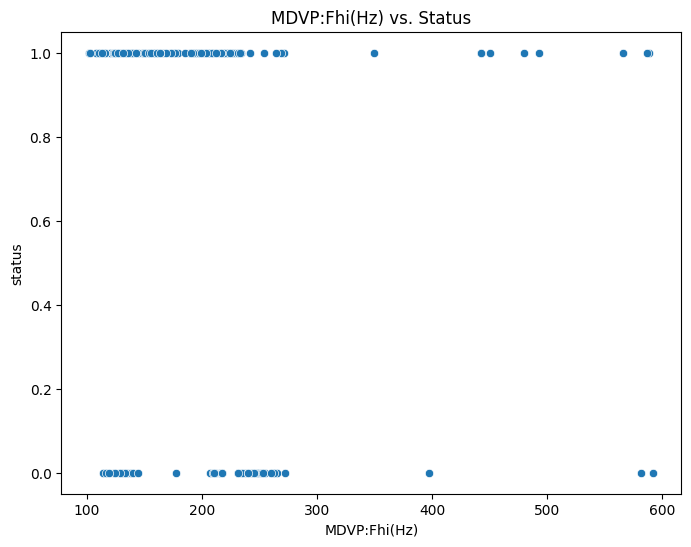

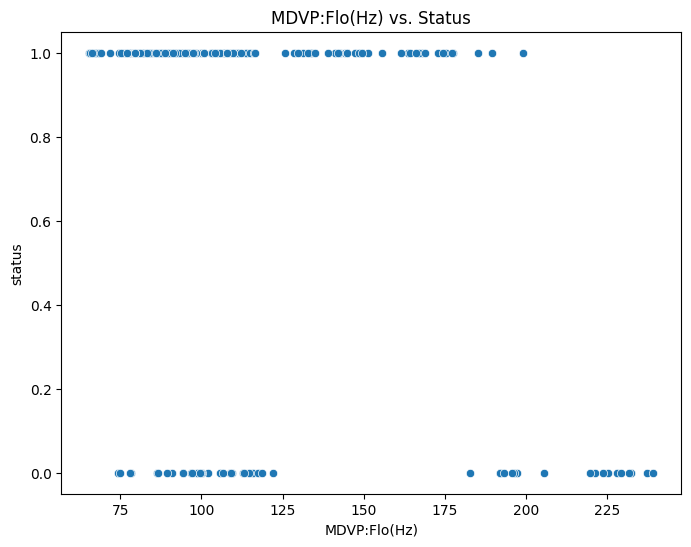

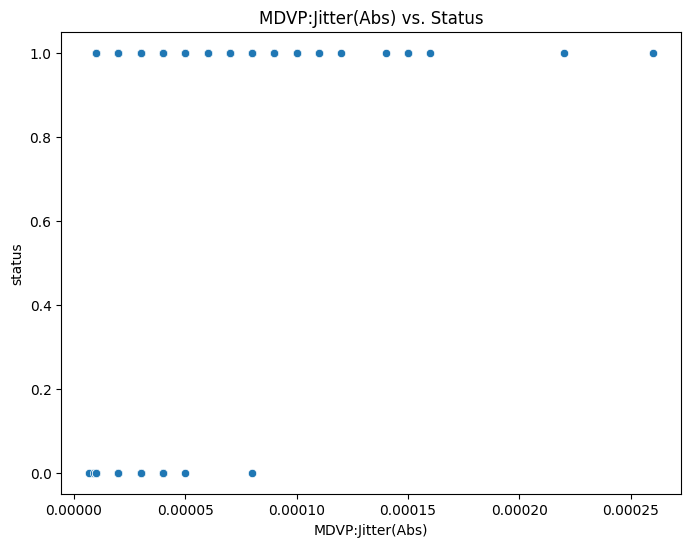

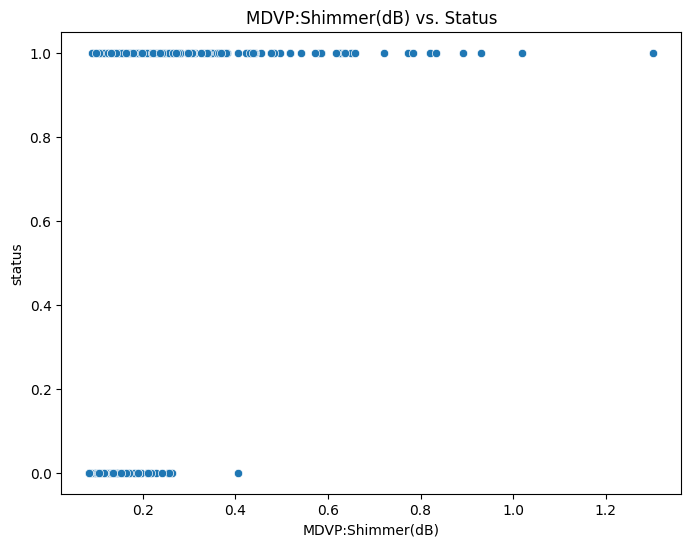

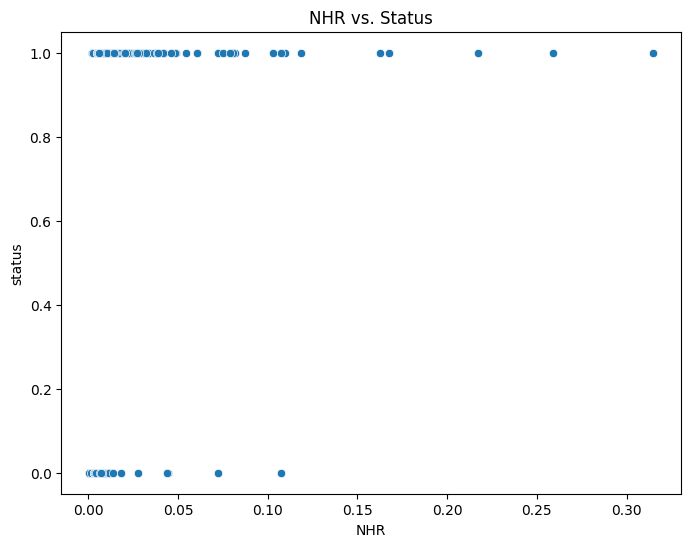

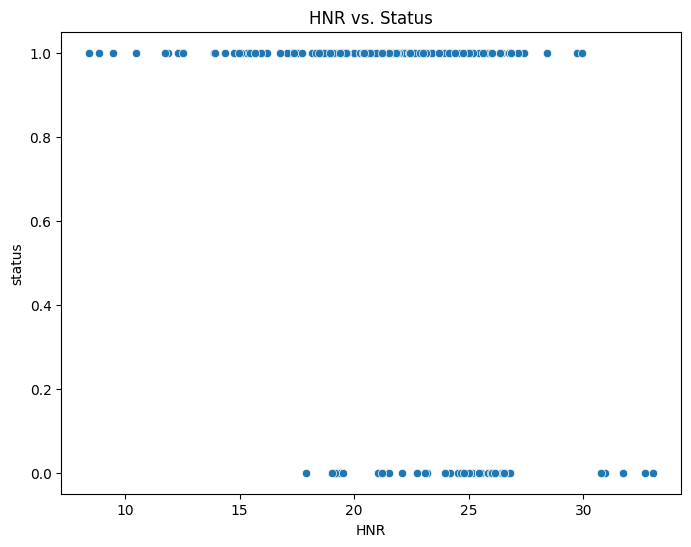

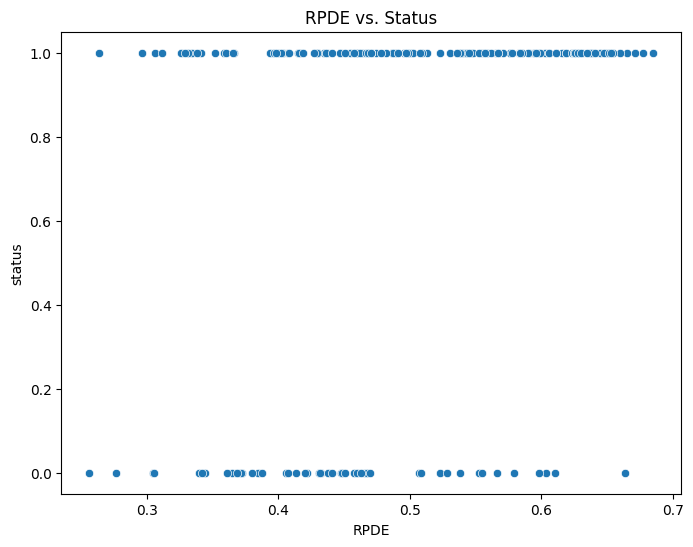

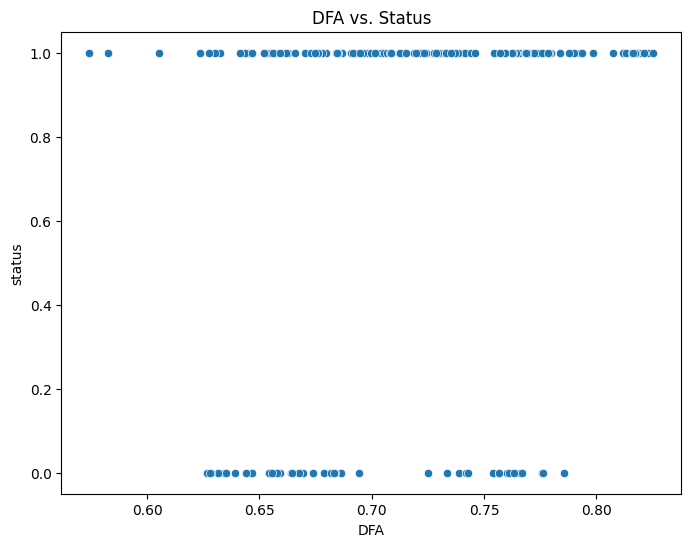

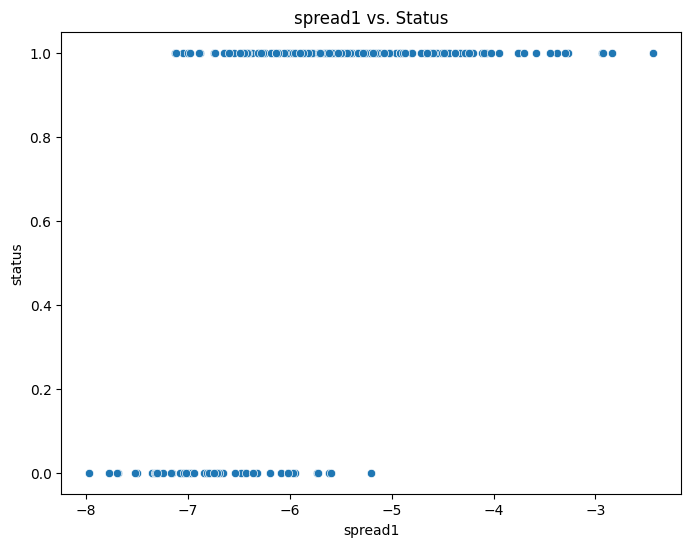

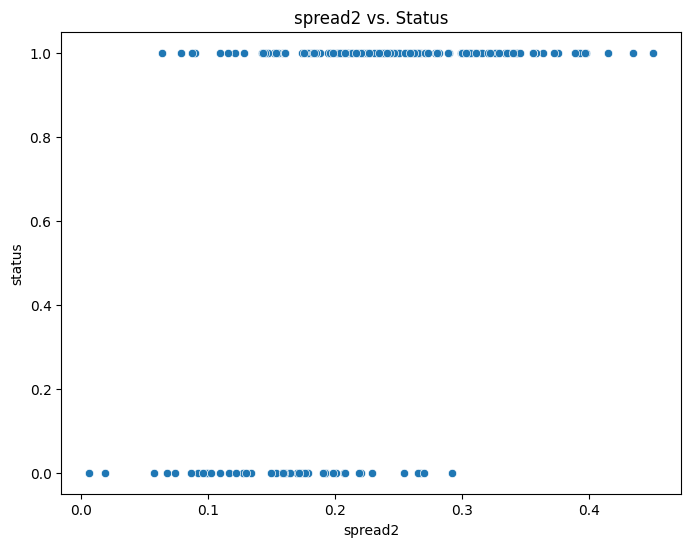

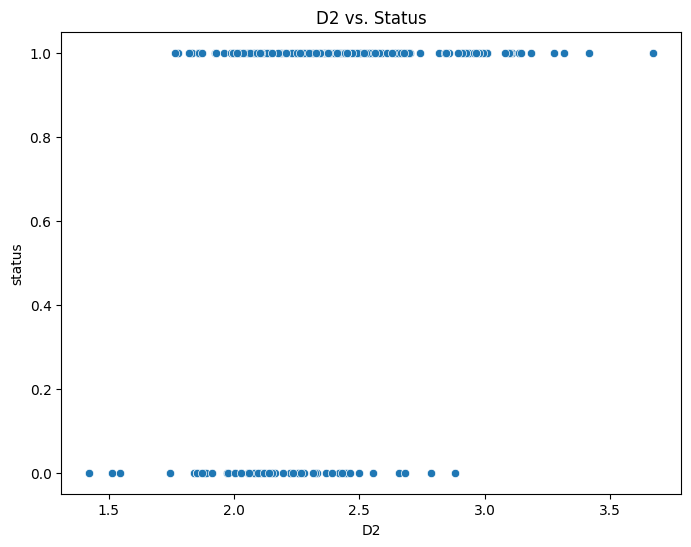

In [255]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature, y='status', data=df)
    plt.title(f'{feature} vs. Status')
    plt.show()

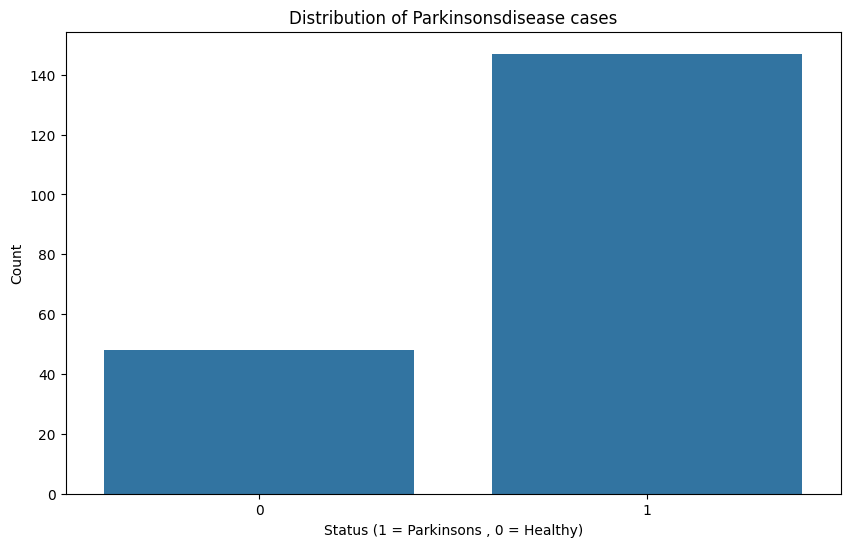

In [234]:
plt.figure(figsize=(10 , 6))
sns.countplot( x = 'status' , data=df)
plt.title('Distribution of Parkinsonsdisease cases')
plt.xlabel('Status (1 = Parkinsons , 0 = Healthy)')
plt.ylabel('Count')
plt.show()

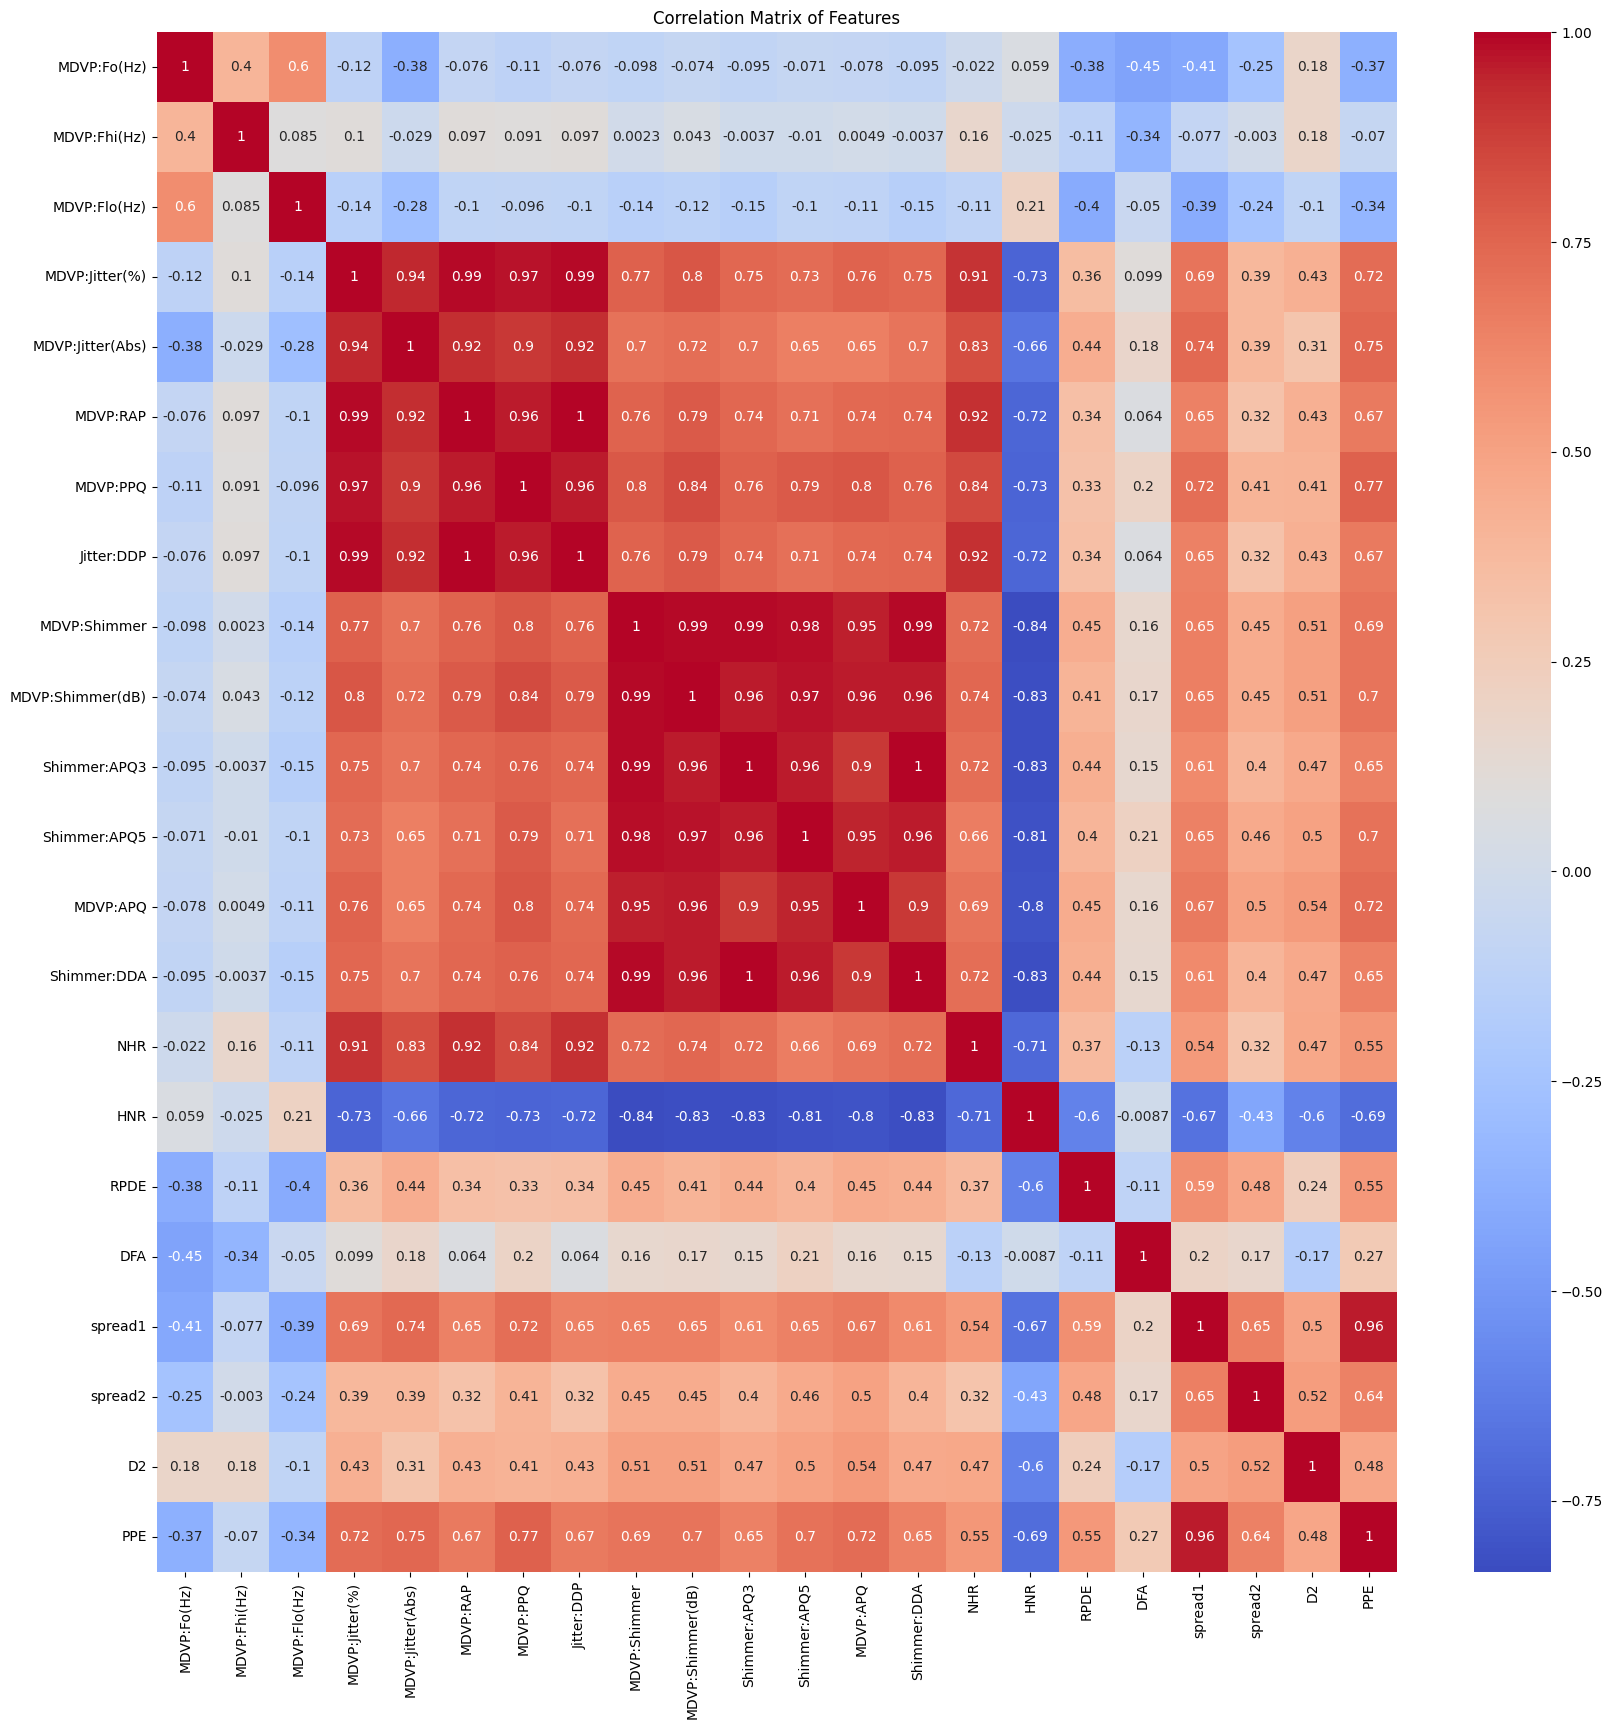

In [235]:
corr=df.drop(columns='status').corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

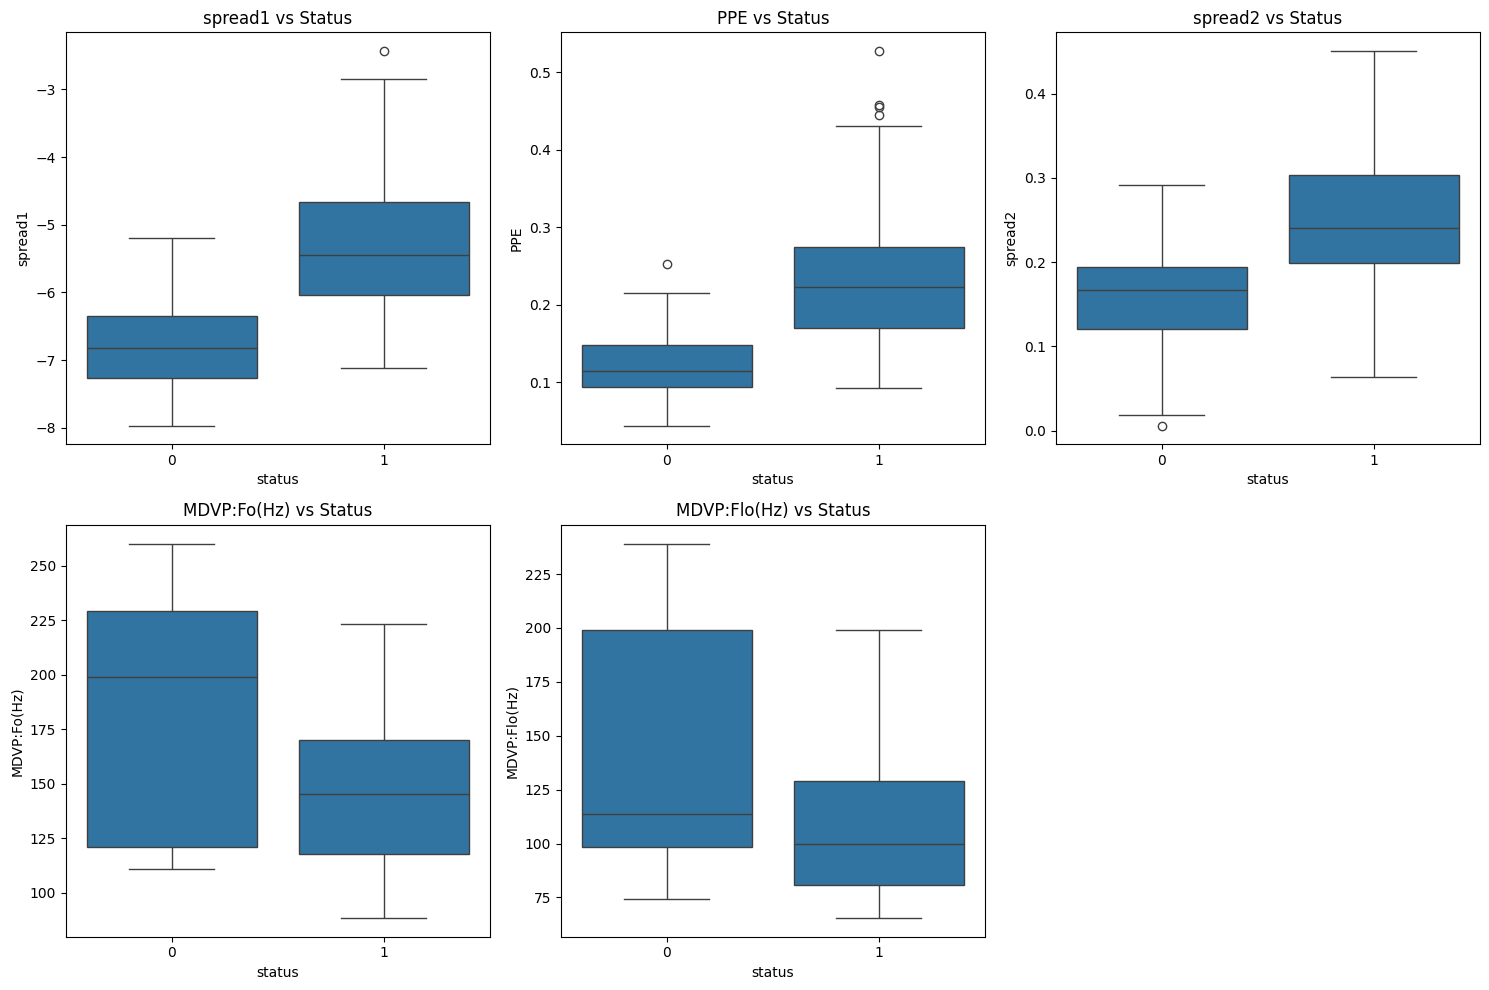

In [236]:
top_features = df.corr()['status'].abs().sort_values(ascending=False).index[1:6]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'{feature} vs Status')
plt.tight_layout()
plt.show()

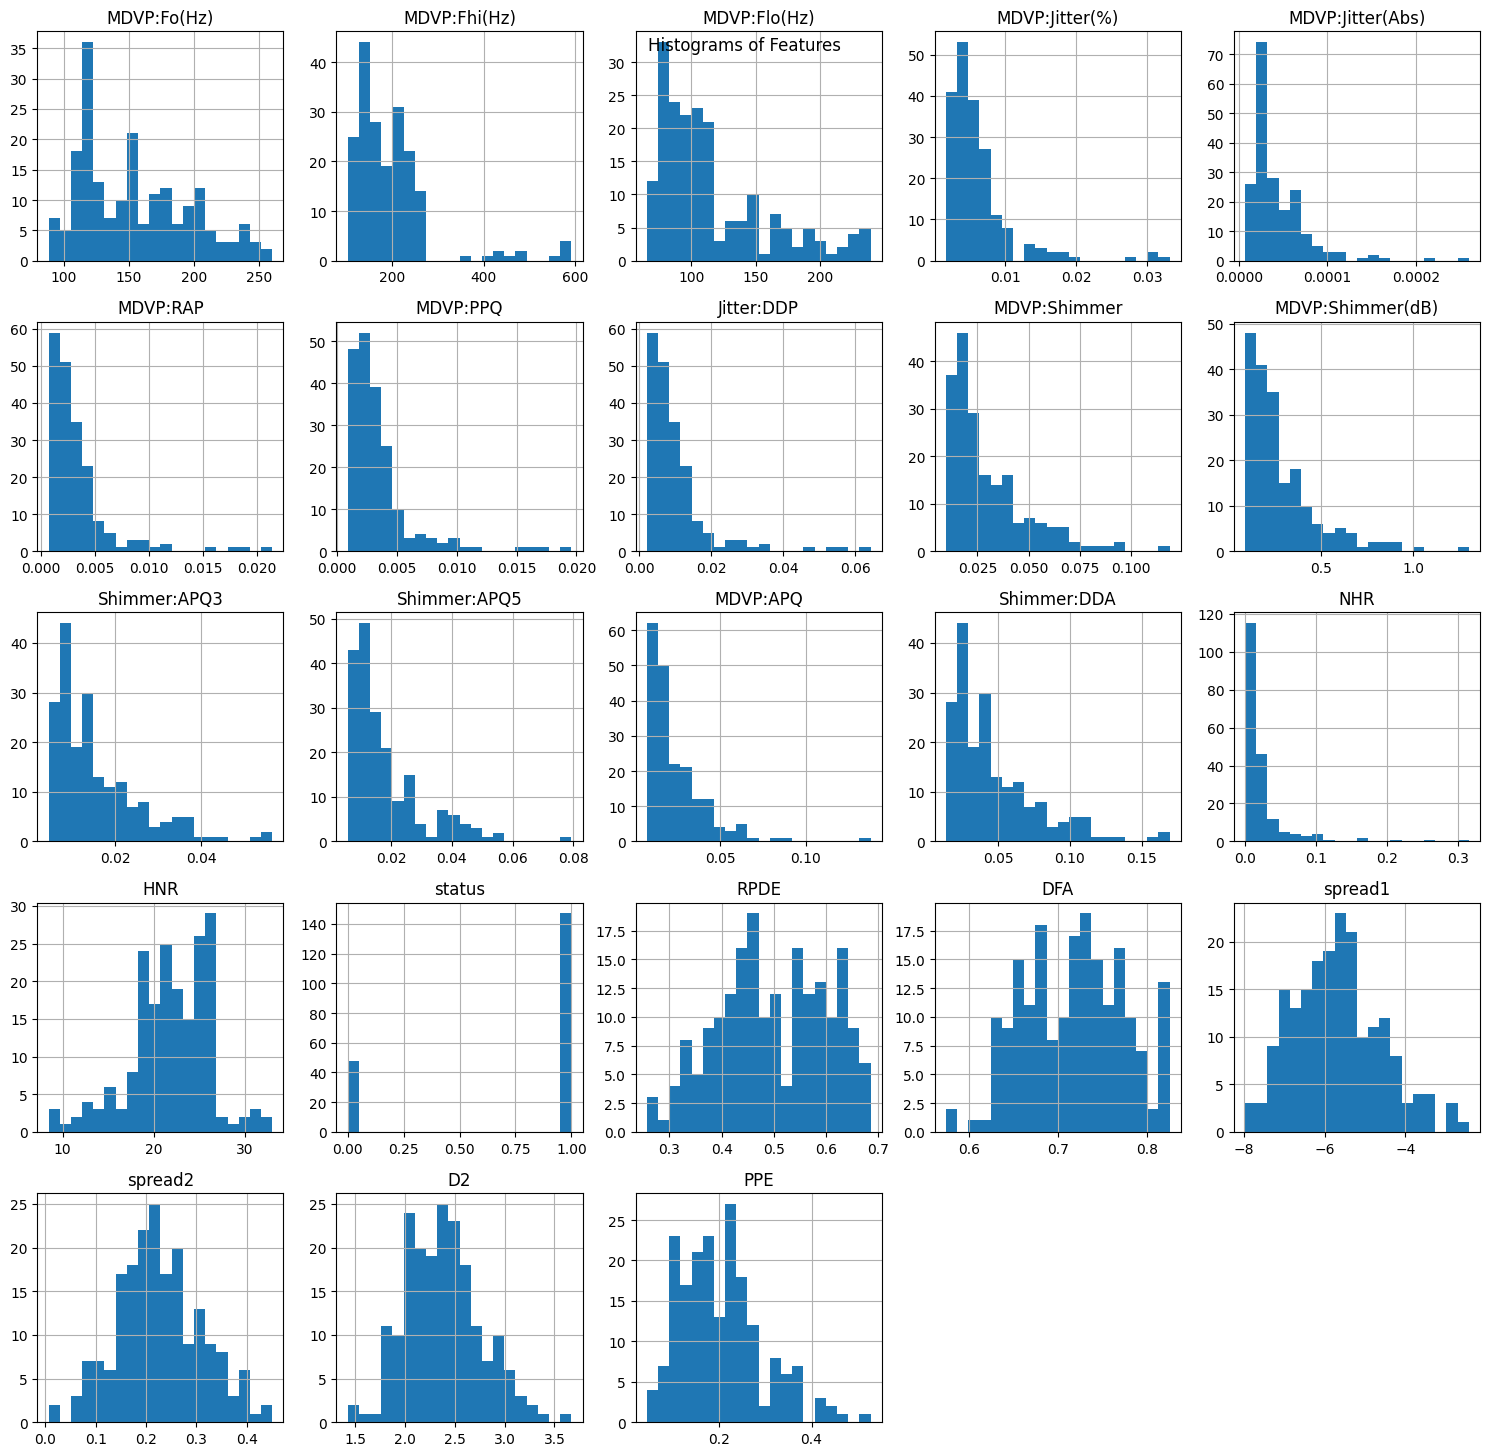

In [237]:
df.hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Features', y=0.95)
plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [238]:
# Drop highly correlated features and leaving one of them
correlated_cols = ["MDVP:Jitter(%)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP",
                   "MDVP:Shimmer", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA" , "PPE"]
df.drop(columns=correlated_cols, inplace=True)

In [239]:
#Getting features and labels
features=df.loc[:,df.columns!='status'].values[:,1:]

labels=df.loc[:,'status'].values.astype(int)

print(labels[labels==1].shape[0], labels[labels==0].shape[0]) #Not Balanced

147 48


In [240]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(features)
y=labels

In [241]:
#Balancing Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [242]:
#Splitting Data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [243]:
#Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)  # Use resampled data for tuning
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}


# **Model Training and Evaluation**

In [244]:
# Train the model after searching for best parameters
xgb_model = XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [245]:
# Cross-Validation
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("Average Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Average Accuracy: 0.8153846153846154
Standard Deviation: 0.09511403585123797


In [246]:
#Accuracy
from sklearn.metrics import accuracy_score

y_pred=xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("XGB_Model Accuracy:", accuracy)

XGB_Model Accuracy: 0.9661016949152542


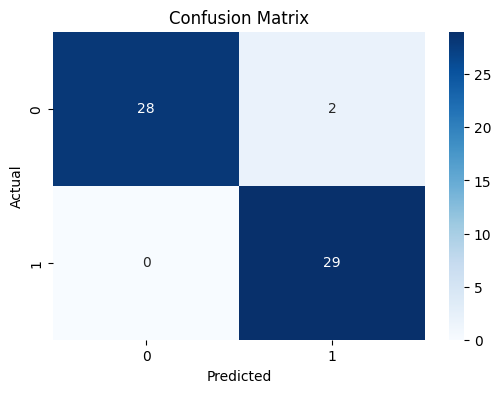

In [247]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [248]:
from sklearn.metrics import classification_report

# Results
print("\nClassification Results:")
print(classification_report(y_test, y_pred))


Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.94      1.00      0.97        29

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



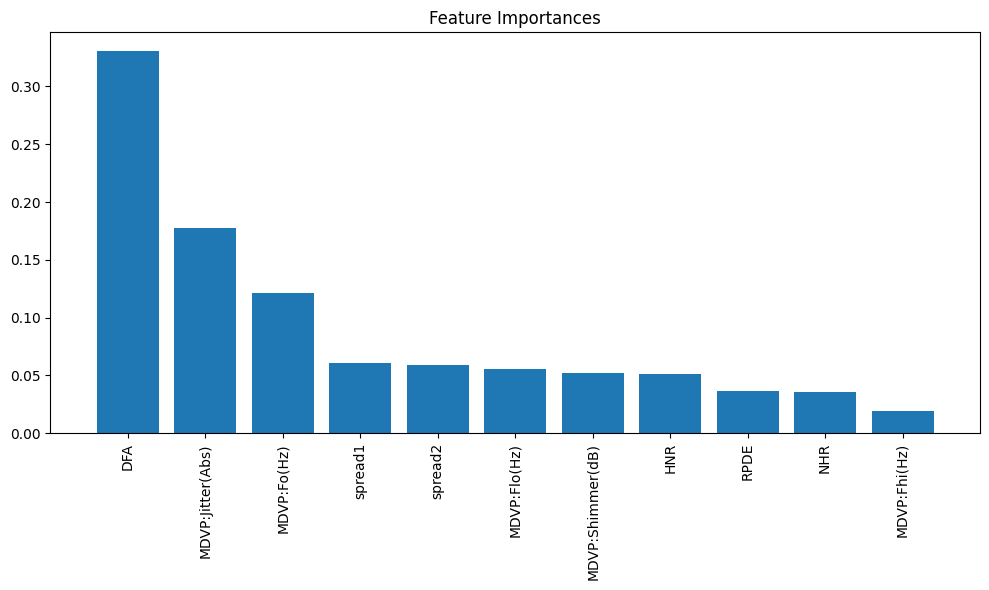

In [249]:
importances = xgb_model.feature_importances_
feature_names = df.drop(columns=['status']).columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()